# Practice Visualization -- France Average Land Temperature

Data From Kaggle: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv

In [20]:
import pandas as pd

In [2]:
temperature_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
temperature_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [3]:
temperature_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
France_temperature = temperature_country.where(temperature_country['Country'] == 'France').dropna()
France_temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
184353,1743-11-01,10.203,2.030,France
184358,1744-04-01,13.190,2.280,France
184359,1744-05-01,14.133,1.891,France
184360,1744-06-01,17.349,1.926,France
184361,1744-07-01,18.782,1.994,France


In [6]:
France_temperature['dt'] =  pd.to_datetime(France_temperature['dt'])
France_temperature['day'] = France_temperature['dt'].dt.day
France_temperature['month'] = France_temperature['dt'].dt.month
France_temperature['year'] = France_temperature['dt'].dt.year
France_temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,day,month,year
184353,1743-11-01,10.203,2.030,France,1,11,1743
184358,1744-04-01,13.190,2.280,France,1,4,1744
184359,1744-05-01,14.133,1.891,France,1,5,1744
184360,1744-06-01,17.349,1.926,France,1,6,1744
184361,1744-07-01,18.782,1.994,France,1,7,1744


<AxesSubplot:xlabel='year', ylabel='AverageTemperature'>

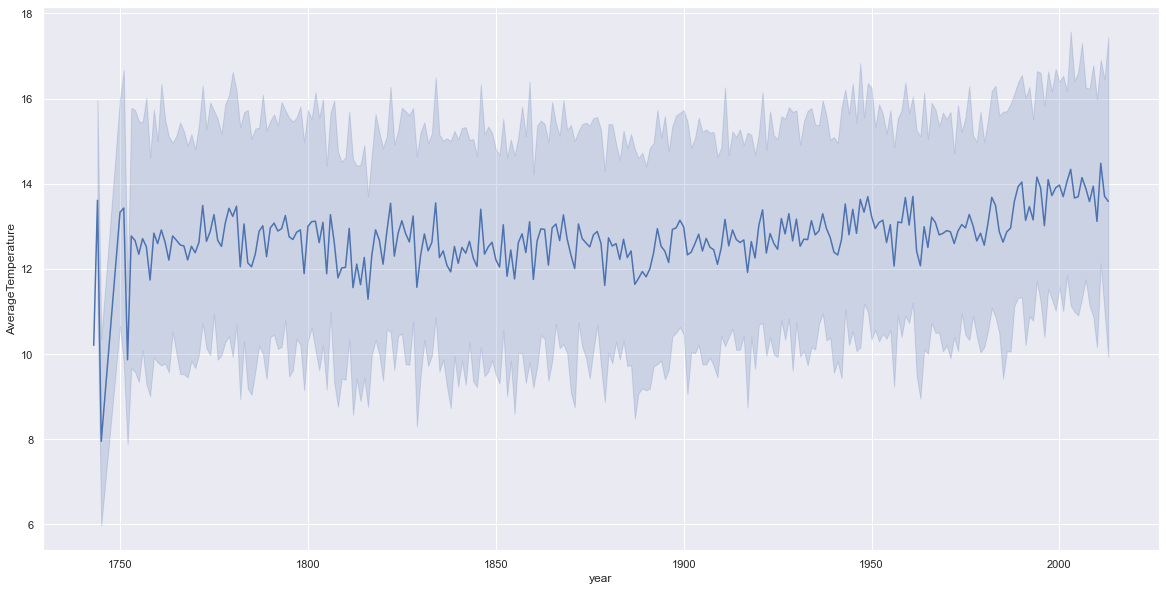

In [19]:
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
sns.lineplot(data=France_temperature,x='year', y='AverageTemperature',err_style="band")